# Importing libraries and Dataset:

VAASU BISHT

VIT BHOPAL

LINKEDIN - https://www.linkedin.com/in/vaasubisht/

VIDEO - https://youtu.be/PG1-2cqOTYA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

# Importing Dataset:

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data",header=None)
df.columns =['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type']
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# EDA

In [3]:
df.describe() 

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


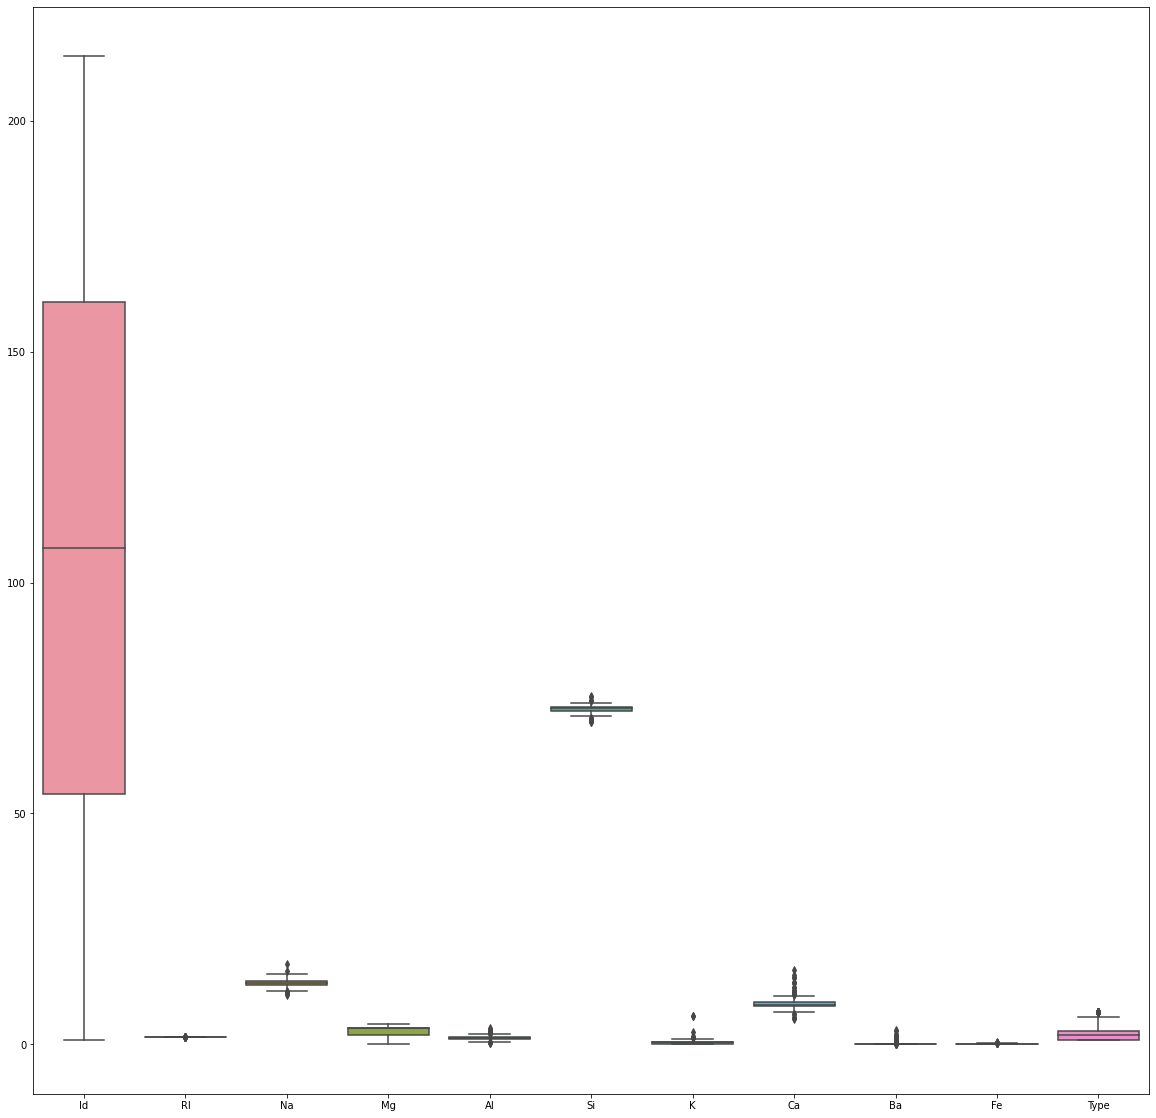

In [4]:
plt.figure(figsize=(20,20))
sns.boxplot(data=df)
plt.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [6]:
df.isnull().sum()

Id      0
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

**OBSERVATION-** There are no NULL values in the given dataset.

In [7]:
df.duplicated().sum()

0

**OBSERVATION-** There are no DUBLICATE values in the given dataset.

In [8]:
print(f"NUMBER OF ROWS/INSTANCES = {df.shape[0]}")
print(f"NUMBER OF FEATURES = {df.shape[1]}")

NUMBER OF ROWS/INSTANCES = 214
NUMBER OF FEATURES = 11


## FINDING OUTLIERS

In [9]:
outlier = []
for i in df.columns:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1
  lower_limit = Q1 - 1.5*IQR
  upper_limit = Q3 + 1.5*IQR

  outlier_column_list = df[(df[i] < lower_limit) | (df[i] > upper_limit )].index

  outlier.append(outlier_column_list)

d = {}
more_than_two_outlier = []
for i in range(len(outlier)):
  if(len(outlier[i]) != 0 ):
    for j in outlier[i]:
      if(j in d):
        d[j] = d[j] + 1
      else:
        d[j] = 1
for i in d:
  if(d[i]>3):
    more_than_two_outlier.append(i)

print(f"NUMBER OF FEATURES HAVING MORE THAN THREE OUTLIER ARE {len(more_than_two_outlier)}")

NUMBER OF FEATURES HAVING MORE THAN THREE OUTLIER ARE 8


In [10]:
more_than_three_outlier

[105, 106, 184, 185, 189, 163, 186, 207]

In [11]:
len(more_than_three_outlier)

8

In [12]:
df = df.drop(more_than_three_outlier).reset_index(drop=True)
print(df.shape)

(206, 11)


In [13]:
X = df.drop('Type',axis = 1)
y = df['Type']

In [14]:
y.value_counts()

2    74
1    70
7    25
3    17
5    12
6     8
Name: Type, dtype: int64

**OBSERVATION-** We can clearly see that the target class is not balanced, this can lead to bias. So I decided to perform Synthetic Minority Oversampling Technique (SMOTE). To make the Imbalanced relatively less.

In [15]:
from imblearn.over_sampling import  SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

In [16]:
y_sm.value_counts()

6    74
2    74
1    70
7    25
3    17
5    12
Name: Type, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15,stratify=y_sm)

In [18]:
y_train.value_counts()

6    59
2    59
1    56
7    20
3    13
5    10
Name: Type, dtype: int64

In [19]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

In [20]:
from sklearn.ensemble import RandomForestClassifier
MODEL = RandomForestClassifier(n_estimators = 13,criterion = 'entropy')

MODEL.fit(X_train, y_train)

y_predidct = MODEL.predict(X_test)
print(f"Accuracy Score: {(accuracy_score(y_test,y_predidct))*100} %")

Accuracy Score: 98.18181818181819 %


In [21]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

In [22]:
print('Classification Report')
print(classification_report(y_test,y_predidct))

Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       0.94      1.00      0.97        15
           3       1.00      0.75      0.86         4
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00        15
           7       1.00      1.00      1.00         5

    accuracy                           0.98        55
   macro avg       0.99      0.96      0.97        55
weighted avg       0.98      0.98      0.98        55



In [23]:
print("Confusion Matrix")
confusion_matrix(y_test,y_predidct)

Confusion Matrix


array([[14,  0,  0,  0,  0,  0],
       [ 0, 15,  0,  0,  0,  0],
       [ 0,  1,  3,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0, 15,  0],
       [ 0,  0,  0,  0,  0,  5]])

In [24]:
print(f"Accuracy Score: {(accuracy_score(y_test,y_predidct))*100} %")

Accuracy Score: 98.18181818181819 %
